# Processo di Bernoulli

Il processo di Bernulli consiste nell'estrazione casuale di un risultato che può avere due valori.

Esempio: estrarre una pallina bianca o rossa da una boccia piena di $B$ palline bianche e $R$ palline rosse.

Secondo la definizione di probabilità classica, la probabilità di estrarre una pallina rossa è uguale al rapporto tra il numero di casi favorevoli ($R$) ed il numero totale di casi ($R+B$):

$p = \frac{\displaystyle R}{\displaystyle R+B}$

La probabilità di un evento negativo (pallina bianca) è ovviamente dato da:

$q = \frac{\displaystyle B}{\displaystyle R+B} = 1 - p$

In sostanza, lo spazio degli eventi $\Omega$ ha due possibili valori: $B$ e $R$ con probabilità $P(B)=q$ e $P(R)=p$. Risulta $P(\Omega)=P(B)+P(R)=1$ (condizione normalizzazione).

<img style="width: 200px" src="img/bernoulli.png">

<span style="color: blue">Da notare che se invertiamo successo ($R$) e insuccesso ($B$) abbiamo ancora una variabile di Bernoulli con probabilità $1-p$.</span>

In [1]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np

Nella terminologia usata anche in scipy, la probabilità di un certo esito viene definita **probability mass function** PMF

In [2]:
p = 0.3
p0 = bernoulli.pmf(0, p)
p1 = bernoulli.pmf(1, p)
print("p(0): {:.2f}".format(p0))
print("p(1): {:.2f}".format(p1))

p(0): 0.70
p(1): 0.30


Una sintassi un po' più *object oriented*:

In [3]:
b = bernoulli(p)
p0 = b.pmf(0)
p1 = b.pmf(1)
print("p(0): {:.2f}".format(p0))
print("p(1): {:.2f}".format(p1))

p(0): 0.70
p(1): 0.30


Può essere conveniente in certe implementazioni generare casualmente 100 eventi di Bernoulli tutti insieme:

In [4]:
r = bernoulli.rvs(p, size = 100)
r

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [5]:
len(r[r==1])

26

Potremmo scrivere semplicemente un'implementazione alternativa alla liberia di python di una variabile di Bernoulli casuale:

In [6]:
import random

In [7]:
def rnd_bernoulli(p):
    r = random.random()
    if r < p: return 1
    else: return 0

In [8]:
rnd_bernoulli(0.3)

1

In [9]:
rnd_bernoulli(0.3)

0

In [10]:
rnd_bernoulli(0.3)

0

In [11]:
rnd_bernoulli(0.3)

1

Rappresentiamo graficamente la distribuzione di Bernoulli con un grafico a barre.

In [12]:
p = 0.3
x = [0, 1]
y = [bernoulli.pmf(n, p) for n in x]

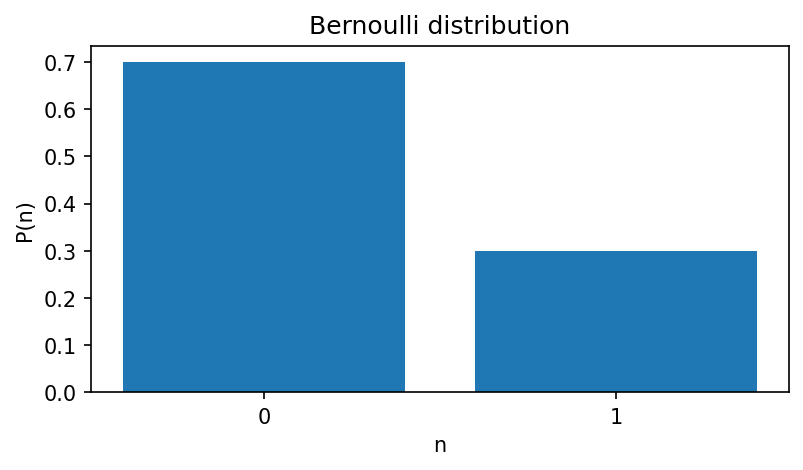

In [13]:
plt.figure(figsize=(6,3), dpi=150)
plt.bar(x, y)
plt.xticks(x)
plt.title('Bernoulli distribution')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.show()

## Esempi di applicazione concreta del processo di Bernoulli:

* La distribuzione di Bernoulli è il modello per la risposta di **un rivelatore che ha un'efficienza $\varepsilon=p$** non necessariamente ideale (ossia è possibile che si abbia $\varepsilon<1$). Il risultato a due valori, 0 o 1, corrisponde a un segnale mancato o rilvelato al passaggio di una particella attraverso il rivelatore.    
* Si può pensare che il risultato di un calcio di rigore tirato dai un certo giocatore segua la distribuzione di Bernoulli. In realtà, questo è vero solo nella schematizzazione in cui la probabilità di segnare $p$ sia la stessa durante, ad esempio, tutto il campionato. La probabilità, in realtà, dipenderà dalle condizioni fisiche del giocatore, dal portiere che si trova di fronte, dall'effetto psicologico di giocare in casa o fuori casa, ecc. Il principio di simmetria della probabilità classica in questo caso è difficilmente applicabile, ma la schematizzazione può essere realizzata, in modo più o meno semplificato, ad esempio, nell'implementazione in un videogame.
* Stesse considerazioni si possono applicare al risultato di un esame da parte di uno studente che, con probabilità $p$, lo supera o può essere bocciato.

## Due eventi indipendenti

Se abbiamo due eventi $A$ e $B$ *indipendenti* che hanno come risultato una variabile di Bernoulli, la probabilità dell'esito congiunto è uguale al prodotto delle probabilità:

$P(A\,\,e\,\,B) = P(A)\,P(B)$

Questo si può applicare a diversi esempi:
* La probabilità che due rivelatori di efficienza $\varepsilon_1$ e $\varepsilon_2$ diano *entrambi* un segnale al passaggio di una particella che li attraversi entrambi è $\varepsilon_1\cdot\varepsilon_2$
* La probabilità che due rivelatori di efficienza $\varepsilon_1$ e $\varepsilon_2$ diano *nessuno dei due* un segnale al passaggio di una particella che li attraversi entrambi è $(1-\varepsilon_1)\cdot(1-\varepsilon_2)$
* Come conseguenza di quanto detto sopra, la probabilità che *uno solo* dei due rivelatori dia un segnale è $1-(1-\varepsilon_1)\cdot(1-\varepsilon_2)-\varepsilon_1\cdot\varepsilon_2 = \varepsilon_1+\varepsilon_2-\varepsilon_1\cdot\varepsilon_2 = \varepsilon_1\cdot(1-\varepsilon_2) + \varepsilon_2\cdot(1-\varepsilon_1)$
* La probabilità che *almeno uno* dei rivealtori dia un segnale vale: $1-(1-\varepsilon_1)\cdot(1-\varepsilon_2)$

prob 1, 2:
 0.8 0.9
prob 1x2:
 [[0.72 0.08]
 [0.18 0.02]]


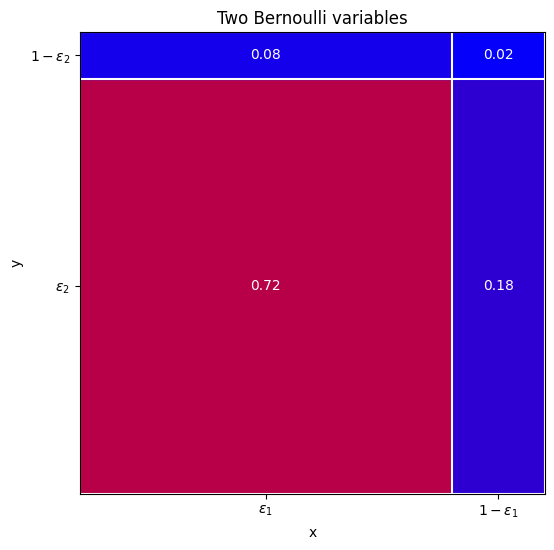

In [14]:
from matplotlib.collections import LineCollection
from matplotlib import patches
import math
e1, e2 = 0.8, 0.9
px = np.array([e1, 1-e1])
py = np.array([e2, 1-e2])
pxy = np.tensordot(px, py, axes = 0)
print("prob 1, 2:\n", e1, e2)
print("prob 1x2:\n", pxy)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
x, y = np.meshgrid(np.array([0, e1, 1]), np.array([0, e2, 1]))
segs1 = np.stack((x,y), axis=2)
segs2 = segs1.transpose(1,0,2)
ax.add_collection(LineCollection(segs1, colors='w'))
ax.add_collection(LineCollection(segs2, colors='w'))
xt = [px[0]/2, px[0]+px[1]/2]
yt = [py[0]/2, py[0]+py[1]/2]
plt.xticks(xt)
plt.yticks(yt)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Two Bernoulli variables')
ax.set_xticklabels([r'$\varepsilon_1$', r'$1-\varepsilon_1$'])
ax.set_yticklabels([r'$\varepsilon_2$', r'$1-\varepsilon_2$'])
def col(p):
    return '#{:02X}00{:02X}'.format(math.floor(p*255),math.floor((1-p)*255))
ax.add_patch(patches.Rectangle((0, 0), px[0], py[0], fill=True, color=col(pxy[0,0])))
ax.add_patch(patches.Rectangle((px[0], 0), px[1], py[0], fill=True, color=col(pxy[1,0])))
ax.add_patch(patches.Rectangle((0, py[0]), px[0], py[1], fill=True, color=col(pxy[0,1])))
ax.add_patch(patches.Rectangle((px[0], py[0]), 1-e1, 1-e2, fill=True, color=col(pxy[1,1])))
for i in range(2):
    for j in range(2):
        text = ax.text(xt[i], yt[j], '{:.02f}'.format(pxy[i, j]), ha="center", va="center", color="white")
plt.show()

# Processo Binomiale

Una variabile casuale binomiale è data dalla somma di $n$ variabili di Bernoulli *indipendenti*, ciascuna con la stessa probabilità $p$.

Definiremo meglio cosa intendiamo per variabili indipendenti. Per ora, possiamo considerare indipendenti due estrazioni successive dove, per ciascuna delle due, tutte le palline vengono sistemate e mescolate casualmente in una boccia da cui ne viene estratta una a caso.

Quindi: dopo $N$ estrazioni contiamo il numero $n$ di palline rosse estratte.

La sequenza di estrazione segue uno dei possibli rami di un albero, come indicato nella figura che segue.

<img style="width: 600px" src="img/binomial.png">

Il numero di casi possibile per ciascuno dei possibili risultati diventa quindi pari al coefficiente della potenza di un binomio:

$\left(\begin{array}{c} N \\ n \end{array}\right) = \frac{\displaystyle N!}{\displaystyle n!(N-n)!}$

La dimostrazione si può fare in modo più rigoroso per ricorrenza.

Considerando che ad ogni biforcazione la probabilità di seguire un ramo o l'altro può essere $p$ oppure $q=1-p$, a seconda se l'esito sia positivo (pallina rossa) oppure negativo (pallina bianca), la probabilità di avere un numero $n$ di esiti positivi (ossia $n$ palline rosse estratte) è pari a:

$P(n;N, p) = \left(\begin{array}{c} n \\ N \end{array}\right) p^n(1-p)^{N-n} = \frac{\displaystyle N!}{\displaystyle n!(N-n)!}p^n(1-p)^{N-n}$

<span style="color:blue;">Corollario: la distribuzione di $N-n$ è una binomiale con parametri $N$ e $1-p$.</span>

<span style="color:green;">Gli statistici professionisti indicano le variabili casuali con la lettera maiuscola, mentre possibili valori particolari della variabile casuale sono indicati con la minuscola. Questa notazione per qualche motivo appare particolarmente antiestetica ai fisici, per cui non la userò.</span>

In [15]:
from scipy.stats import binom

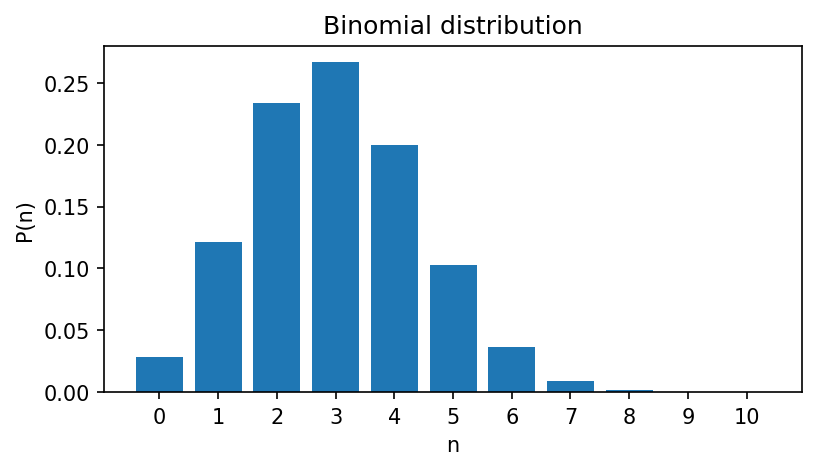

In [16]:
plt.figure(figsize=(6,3), dpi=150)
p = 0.3
N = 10
x = list(range(N+1))
y = [binom.pmf(n, N, p) for n in x]
plt.bar(x, y)
plt.xticks(x)
plt.title('Binomial distribution')
plt.xlabel('n')
plt.ylabel('P(n)')
#plt.yscale('log')
plt.show()

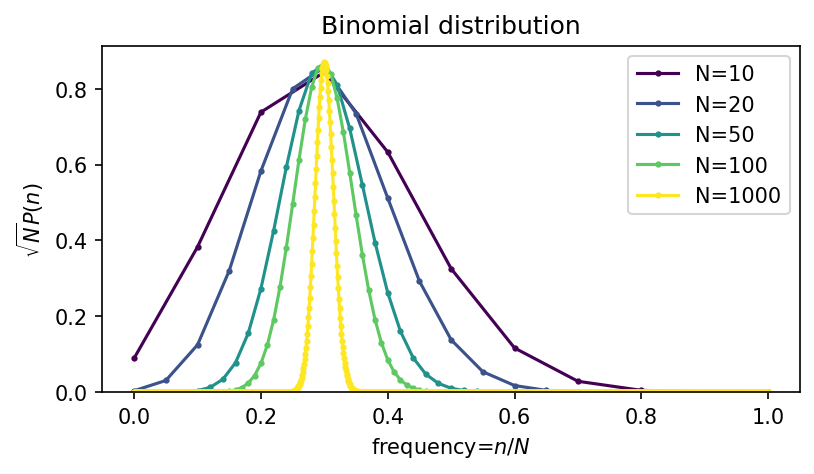

In [17]:
plt.figure(figsize=(6,3), dpi=150)
Ns = [10, 20, 50, 100, 1000]
colors = np.linspace(0, 1, len(Ns))
for N, c in zip(Ns, colors):
    p = 0.3
    x = np.array(list(range(N+1)))
    y = np.array([binom.pmf(n, N, p) for n in x])
    plt.plot(x/N, y*np.sqrt(N), marker='o', markersize=2, label='N={}'.format(N), color=plt.get_cmap('viridis')(c))
plt.title('Binomial distribution')
plt.xlabel('frequency=$n/N$')
plt.ylabel('$\sqrt{N} P(n)$')
plt.ylim(0)
plt.legend()
plt.show()

# Legge dei grandi numeri

Si può dimostrare, come abbiamo fatto sopra visivamente, che:

$\displaystyle\forall \varepsilon >0\ \ \lim_{N\rightarrow\infty}P\left(\left|\frac{n}{N}-p\,\right|<\varepsilon\right) =1$

La *frequenza* di casi favorevoli ($n/N$) converge, in probabilità, alla probabilità $p$. Da questa proprietà discenderà la legge dei grandi numeri.

# Esempi di applicazione concreta del processo binomiale:
* Su $N=20\,000$ vaccinati, $n$ sono immunizzati dalla malattia (o dall'infezione). La probabilità di immunizzarsi è l'**efficacia di un vaccino**.
* La distribuzione binomiale è il modello per il **numero di conteggi di un rivelatore che ha un'efficienza $\varepsilon=p$** non necessariamente ideale (ossia può essere $\varepsilon<1$). Il numero di conteggi $n$ rispetto al numero totale di particelle che attraversano il rivelatore $N$ segue la distribuzione binomiale.
* Se $p$ è la probabilità che un giocatore segni un rigore, considerando i cinque calci di rigore previsto al termine dei tempi supplementare, il numero $n\le 5$ di rigori segnati segue una distribuzione binomiale (soltanto in un modello ideale particolarmente semplificato)


# Distribuzione di Poisson
La distribuzione di Poisson si ottiene come limite della distrubuzione binomiale per $N\rightarrow\infty$.
Se $N\rightarrow\infty$, anche il numero di estrazioni di risultati positivi $n$ tenderà ad assumere valori divergenti, a meno che $p$ non tende a zero mente $N$ tende all'infinito. Per questo, assumiamo e che $\nu=pN$ resti costante. In questo caso, la distribuzione binomiale: 

$P(n; N, p) = \frac{\displaystyle N!}{\displaystyle n!(N-n)!}p^n(1-p)^{N-n}$

Diventa, sostituendo $p$ con $\nu/N$:

$P(n;\nu) = \frac{\displaystyle N!}{\displaystyle n!(N-n)!}{\left(\frac{\displaystyle\nu}{\displaystyle N}\right)}^n\left(1-\frac{\displaystyle\nu}{\displaystyle N}\right)^{N-n}$

Con qualche manipolazione:

$P(n;\nu) = \frac{\displaystyle \nu^N}{\displaystyle n!}
\,\frac{\displaystyle N!}{\displaystyle (N-n)! N^n}
\left(1-\frac{\displaystyle\nu}{\displaystyle N}\right)^N
\left(1-\frac{\displaystyle\nu}{\displaystyle N}\right)^{-n}$

Semplificando un paio di termini con i fattoriali al numeratore e denominatore:

$P(n;\nu) = \frac{\displaystyle \nu^n}{\displaystyle n!}
\,\frac{\displaystyle N (N-1)\cdots (N-n-1)}{\displaystyle N^n}
\left(1-\frac{\displaystyle\nu}{\displaystyle N}\right)^N
\left(1-\frac{\displaystyle\nu}{\displaystyle N}\right)^{-n}$

Per $N\rightarrow\infty$, il termine $\nu^n/n!$ resta costante, mentre gli altri tre tendono rispettivamente a:
* 1 (al numeratore ci sono $n$ termini, tutti che tendono a $N$
* $e^{-\nu}$ (si tratta di un limite notevole)
* 1 (il termine $\nu/N$ in parentesi tende a zero)

La distribuzione diventa quindi:

$P(n;\nu) = \frac{\displaystyle \nu^n e^{-\nu}}{\displaystyle n!}$

<span style="color: blue">La distribuzione di Poisson è il modello per il numero di particelle che attraversano un rivelatore, in fatti il numero di conteggi $n$ acquisito in un certo tempo $t$ in cui il numero atteso di conteggio è $\nu$, segue la distribuzione di Poisson. Questo si può applicare ad un rivelatore che registra raggi cosmici oppure particelle prodotte ad un acceleratore. Il numero atteso di conteggi $\nu$ si può confrontare con le previsioni di un modello teorico, se disponibile.
</span>

In [18]:
from scipy.stats import poisson

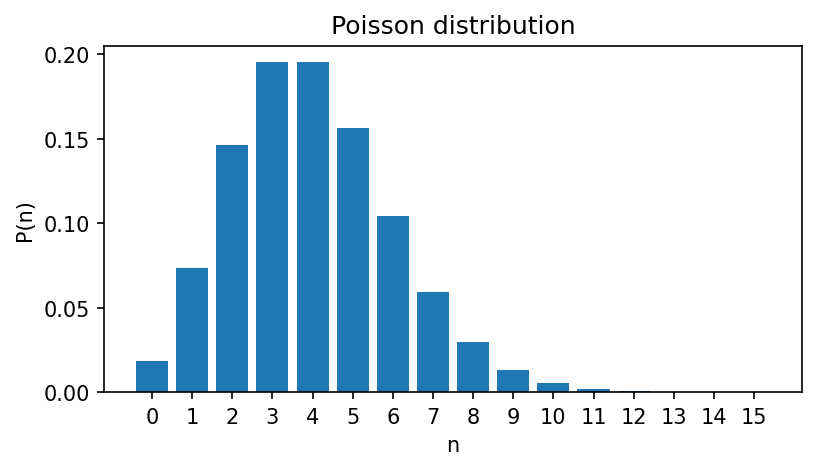

In [19]:
plt.figure(figsize=(6,3), dpi=150)
nu = 4
n_max = 15
x = list(range(n_max+1))
y = [poisson.pmf(n, nu) for n in x]
plt.bar(x,y)
plt.xticks(x)
plt.title('Poisson distribution')
plt.xlabel('n')
plt.ylabel('P(n)')
#plt.yscale('log')
plt.show()

Proviamo un confronto numerico tra una binomiale ed una poissoniana dove $\nu=p N$, con $N$ grande e $p$ piccolo.

4.0


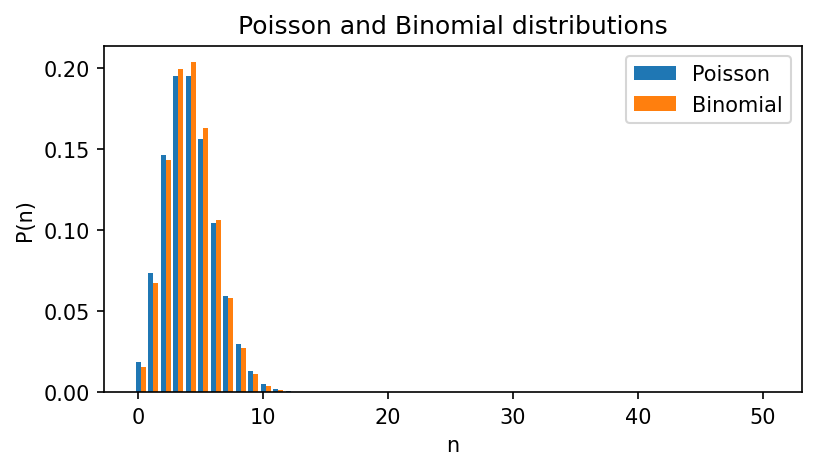

In [20]:
plt.figure(figsize=(6,3), dpi=150)
p = 0.08
N = 50
nu = p*N
print(nu)
x = np.arange(N+1)
y1 = [poisson.pmf(n, nu) for n in x]
y2 = [binom.pmf(n, N, p) for n in x]
width = 0.4
plt.bar(x,y1,width,label='Poisson')
plt.bar(x+width,y2,width,label='Binomial')
plt.title('Poisson and Binomial distributions')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.legend()
#plt.yscale('log')
plt.show()

Vedremo che esiste un modo per mettere in relazione la distribuzione di Poisson partendo da una distribuzione uniforme.
Ma dobbiamo prima introdurre in modo più sistematico le distribuzioni di probabilità nel caso continuo.

# Esempi di applicazione concreta del processo di Poisson:
* Numero di morti in un giorno in Italia. Il processo è chiaramente binomiale ($N\simeq 60.000.000$), ma la probabilità $p$ è talmente piccola che $N$ si può considerare infinito. Il numero di morti al giorno $\nu$ vale circa $1.500$.
* Numero di gocce di pioggia che cadono in un secchio in un minuto.
* Numero di raggi cosmici che attraversano un rivelatore in un minuto.

Sono tutti casi in cui il tasso degli eventi di interesse è noto e non c'è un limite superiore, almeno in buona approssimazione, al numero di casi che si possono osservare.

## Distribuzione cumulativa

La distribuzione cumulativa di una distribuzione $P(x)$ come la probabilità che $x\le y$:

$\displaystyle F(y) = P(x\le y) = \sum_{x\le y} P(x)$

Con ```scipy``` ogni distribuzione ha una funzione ```cdf``` che calcola la cumulativa.

In [21]:
p_3_5 = poisson.cdf(3, 5)
print("Prob(n<=3), nu=5:", p_3_5)

Prob(n<=3), nu=5: 0.2650259152973616


Chiaramente:

$P(x > y) = 1-P(x\le y) = 1 - F(y)$

In [22]:
print("Prob(n>3), nu=5:", 1 - p_3_5)

Prob(n>3), nu=5: 0.7349740847026385


# Spunti per esercizi

* Il 17/3/2021 il Paul-Erlich-Institut ha circolato un [comunicato](https://www.pei.de/SharedDocs/Downloads/EN/newsroom-en/hp-news/faq-temporary-suspension-astrazeneca.pdf) che ha portato alla sospenzione del vaccino AstraZeneca. Erano stati osservati 7 casi (su 1.7 milioni) di una rara trombosi quandi ne era atteso, in media 1. Calcolare qual è la probabilità di avere 7 o più casi quando ne sono attesi 1. Calcolare la stessa probabilità quando se ne attendono invece 2 o 3.

In [23]:
n_min = 7
nu = 1
p_1 = 1 -  poisson.cdf(n_min - 1, nu)
p_2 = 1 -  poisson.cdf(n_min - 1, 2)
p_3 = 1 -  poisson.cdf(n_min - 1, 3)
print(p_1)
print(p_2)
print(p_3)

8.324114928803805e-05
0.004533805526248824
0.033508535308841236


* Durante la pandemia molti esami furono sostituiti da test online a risposta multipla. Se un test prevede 5 domande, ciascuna con 3 risposte, calcolare la probabilità di indovinare almeno 4 risposte a caso. Come cambia la probabilità se invece ci sono 5 risposte?

In [24]:
def p_success(n_answers, n_questions, n_min):
    p = 1.0/n_answers
    b = binom(n_questions, p)
    return 1 - b.cdf(n_min - 1)
n_answers = 3
n_questions = 5
n_min = 4
print(p_success(n_answers, n_questions, n_min))
n_answers = 5
print(p_success(n_answers, n_questions, n_min))

0.04526748971193417
0.006719999999999948


* In Italia nel 2019 per incidenti d'auto sono morte 3.173 persone e 241.384 sono risultate ferite (fonte: [ISTAT](https://www.istat.it/it/archivio/245757)) su un totale di [59.816.673 abitanti](http://demo.istat.it/popres/index.php?anno=2019). Qual è la probabilità che a Pozzuoli (79.752 abitanti) ci siano meno di 2 morti in un anno (assumendo una probabilità uniforme sul territorio nazionale)?

In [25]:
N_italia = 59816673
p = 3173 / N_italia
N_pozzuoli = 79752
nu = p * N_pozzuoli
print("nu = " , nu)
p_2 = poisson.cdf(1, nu)
print("P(n<2) = ", p_2)
p_2 = binom.cdf(1, N_pozzuoli, p)
print("P(n<2) = ", p_2)

nu =  4.2304776128220976
P(n<2) =  0.07607960770160224
P(n<2) =  0.07607433537608348


* Un esperimento è fatto da 5 rivelatori sovrapposti tutti con efficienza $\varepsilon=0.9$. *Ci si aspetta* che, in un certo tempo $N=10.000$ raggi cosmici attraversino tutti i rivelatori. Dire qual è la distribuzione del numero osservato di raggi cosmici $n$ che nello stesso intervallo di tempo producono un segnale su almeno 3 rivelatori su 5.

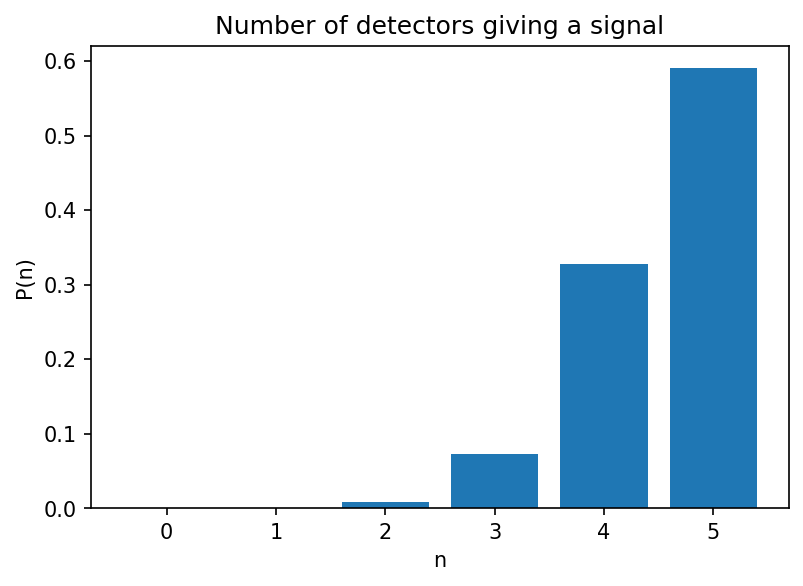

In [26]:
plt.figure(figsize=(6,4), dpi=150)
p = 0.9
N = 5
x = list(range(N+1))
y = [binom.pmf(n, N, p) for n in x]
plt.bar(x,y)
plt.xticks(x)
plt.title('Number of detectors giving a signal')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.show()

In [27]:
eff = 0.9
N = 10000
n_detector = 5
n_majority = 3
# qual è la distribuzione del numero di raggi cosmici n tali che n_signal >= n_majority ?

#Poissoniana che ha come valor medio N * (1- binom.cdf(2, 5, 0.9))
p_trigger = 1 - binom.cdf(2, 5, 0.9)
print(p_trigger)
nu = N*p_trigger
print(nu)

0.99144
9914.4


* Supponiamo che in un paese la probabilità che una spedizione tracciabile vada persa sia il 3 per mille. Calcolare la probabilità che un venditore su interenet abbia almeno 3 feedback negativi su 100 acquisti per colpa delle poste.

In [28]:
p = 1 - binom.cdf(2, 100, 0.003)
print(p)

0.003514621968486842
